In [1]:
print("Gold Price Prediction using Machine Learning with Python by APELETE ADODO SOSSOU")

Gold Price Prediction using Machine Learning with Python by APELETE ADODO SOSSOU


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#loading our dataset 
gold_data=pd.read_csv('gold_price.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#The last rows of our dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#The shape of our dataset->the number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#Some informations about our dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#Some descriptions about the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#Checkinf if there are some missing values in the dataset
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Find the correlation

In [12]:
numeric_columns = gold_data.select_dtypes(include='number').columns
correlation = gold_data[numeric_columns].corr()

#correlation=gold_data.corr()

<Axes: >

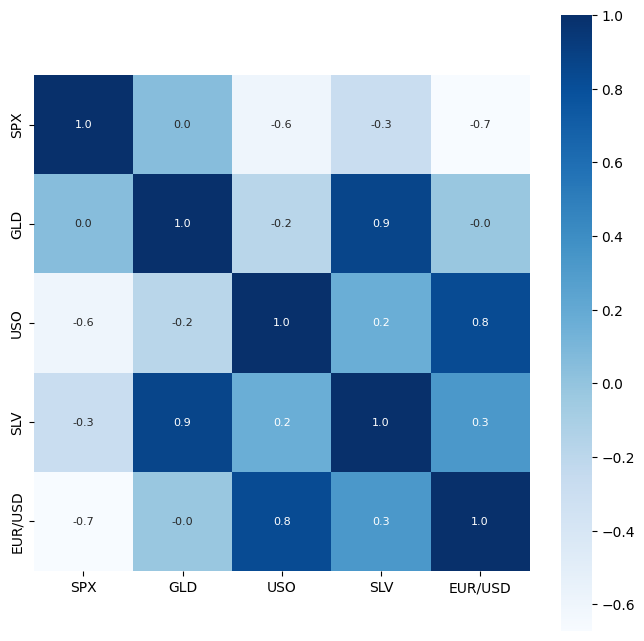

In [13]:
#Understanding the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
# Correlation values of GLD=Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


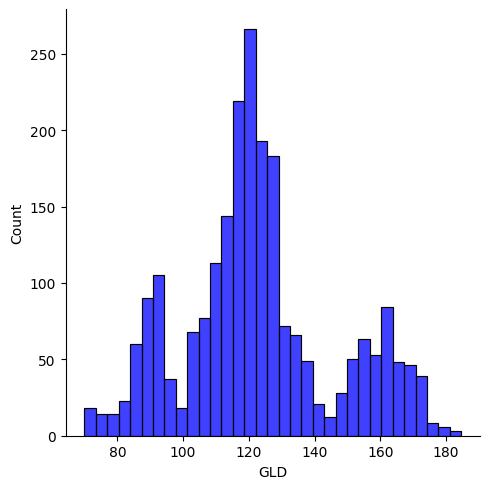

In [17]:
#Distribution of GLD Price
sns.displot(gold_data['GLD'],color='blue')

We're gonna split the features and target

In [19]:
X=gold_data.drop(['Date','GLD'], axis=1)
Y=gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Now we should split the dataset into Training data and Test Data

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Let's train our Model using Random Forest Regressor

In [24]:
regressor=RandomForestRegressor(n_estimators=100)

In [25]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Now we can Evaluate our Model

In [26]:
#Prediction on the Test Dataset
test_data_prediction=regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.75049974  82.09439981 116.00680022 127.73270041 120.66230117
 154.83669766 150.25149823 126.15580038 117.54629876 126.08500089
 116.75000092 171.97560104 141.92629873 167.9500987  115.17500002
 117.69380064 139.73890292 170.36790125 159.72540221 159.55459954
 155.15920053 125.11289977 175.15199958 156.96920337 125.14260023
  93.77360003  77.47539989 120.27359991 119.12519929 167.47980058
  87.94460047 125.23320005  91.03450064 117.75859962 121.17099943
 136.00140112 115.62780149 115.09440082 147.41190017 107.23450075
 104.34750247  87.15409783 126.37520062 117.93010015 152.99709949
 119.60040023 108.37930016 107.87149812  93.21910064 127.03259813
  75.26720045 113.71459949 121.14820005 111.08849963 118.9307989
 120.79539927 159.47699991 165.82440199 147.40689728  85.72249849
  94.16470033  86.87579894  90.66160053 119.00790088 126.44830069
 127.46229978 169.8304997  122.2569994  117.4290989   98.53540017
 168.30840179 142.79689811 131.99820207 121.25700227 121.07699951
 119.938800

In [28]:
#R squared error 
error=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error)

R squared error : 0.9891140525844816


Comparison of the actual values with the predicted values 

In [29]:
Y_test=list(Y_test)

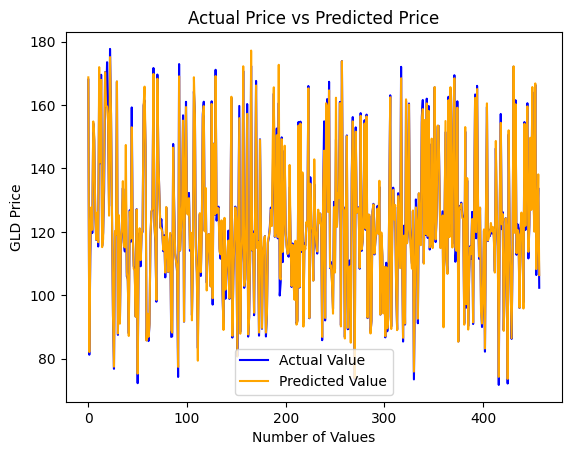

In [31]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()